In [1]:
# import required libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# load the csv into a dataframe
lending_df = pd.read_csv('loan.csv')

In [3]:
# check the shape of the dataframe
lending_df.shape

(39717, 111)

In [4]:
# display information about the dataframe
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# let's see which columns have null values and how much
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('emp_title', 2459),
 ('emp_length', 1075),
 ('desc', 12940),
 ('title', 11),
 ('mths_since_last_delinq', 25682),
 ('mths_since_last_record', 36931),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('next_pymnt_d', 38577),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('mths_since_last_major_derog', 39717),
 ('annual_inc_joint', 39717),
 ('dti_joint', 39717),
 ('verification_status_joint', 39717),
 ('tot_coll_amt', 39717),
 ('tot_cur_bal', 39717),
 ('open_acc_6m', 39717),
 ('open_il_6m', 39717),
 ('open_il_12m', 39717),
 ('open_il_24m', 39717),
 ('mths_since_rcnt_il', 39717),
 ('total_bal_il', 39717),
 ('il_util', 39717),
 ('open_rv_12m', 39717),
 ('open_rv_24m', 39717),
 ('max_bal_bc', 39717),
 ('all_util', 39717),
 ('total_rev_hi_lim', 39717),
 ('inq_fi', 39717),
 ('total_cu_tl', 39717),
 ('inq_last_12m', 39717),
 ('acc_open_past_24mths', 39717),
 ('avg_cur_bal', 39717),
 ('bc_open_to_buy', 39717),
 ('bc_util', 39717),
 ('chargeoff_within_12_mths', 56),
 ('mo_sin_ol

In [6]:
# remove all columns that doesn't have any data at all
lending_df = lending_df.dropna(axis=1, how='all')

In [7]:
# check the dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('emp_title', 2459),
 ('emp_length', 1075),
 ('desc', 12940),
 ('title', 11),
 ('mths_since_last_delinq', 25682),
 ('mths_since_last_record', 36931),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('next_pymnt_d', 38577),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('chargeoff_within_12_mths', 56),
 ('pub_rec_bankruptcies', 697),
 ('tax_liens', 39)]

In [8]:
# drop few other columns that have significant missing values or are irrelevant
columns_to_drop = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc']
lending_df.drop(columns = columns_to_drop, inplace=True)
lending_df.shape

(39717, 53)

In [9]:
# check the dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('emp_title', 2459),
 ('emp_length', 1075),
 ('title', 11),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('chargeoff_within_12_mths', 56),
 ('pub_rec_bankruptcies', 697),
 ('tax_liens', 39)]

In [10]:
# inspect employee title
# number of employers / employee title
print(len(lending_df['emp_title'].unique()))

# count of employee titles
print(lending_df['emp_title'].value_counts())

28821
US Army                         134
Bank of America                 109
IBM                              66
AT&T                             59
Kaiser Permanente                56
                               ... 
Speeds Express Deli               1
VA MEDICAL CENTER                 1
NCI Information Systems Inc.      1
Merritt's Ace Hardware            1
Shades Crest Baptist Church       1
Name: emp_title, Length: 28820, dtype: int64


In [11]:
# remove employee title column as it has lot of missing values and doesn't think it would impact the analysis as much considering there are
# 28K unique employee titles and the individual counts are not that high
lending_df.drop(columns=['emp_title'], inplace=True)

In [12]:
# we have emp_length with 1000 plus missing values. First clean employee length before taking a call on what to do
lending_df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [13]:
# Just get the numericals from the emp_length data (less than 1 is considered one and above 10 is considered 10)
lending_df['emp_length'] = lending_df['emp_length'].apply(lambda x: str(x).replace('years', '').replace('year', '').replace('<','').replace('+',''))

In [14]:
# analyse the values and it's distribution
lending_df['emp_length'][lending_df['emp_length'] != 'nan'].apply(lambda x: int(x)).value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [15]:
# Try to impute values for employee length based on the distribution so that it doesn't skew the analysis
# set 'nan' string to actual nulls
lending_df['emp_length'] = lending_df['emp_length'].replace('nan', np.nan)

# get distribution of non null values
dbn = lending_df['emp_length'].dropna().apply(lambda x: int(x)).value_counts(normalize=True)

#missing values
mval = lending_df['emp_length'].isnull()
num_mval = mval.sum()

# values to impute
impute_val = np.random.choice(dbn.index, num_mval, p=dbn.values)

# finally fill nan with
lending_df.loc[mval, 'emp_length'] = impute_val

In [16]:
# convert everything to integer
lending_df['emp_length'] = lending_df['emp_length'].apply(lambda x: int(x))

In [17]:
# check again
lending_df['emp_length'].value_counts()

10    9136
1     8018
2     4509
3     4217
4     3540
5     3373
6     2294
7     1823
8     1517
9     1290
Name: emp_length, dtype: int64

In [18]:
# check dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('title', 11),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('chargeoff_within_12_mths', 56),
 ('pub_rec_bankruptcies', 697),
 ('tax_liens', 39)]

In [19]:
# 'pub_rec_bankruptcies' is a significant field in the analysis as this shows how many times a person filed for bankruptcies, hence removing records without this value
lending_df = lending_df.dropna(subset=['pub_rec_bankruptcies'])

In [21]:
# check dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('title', 11),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('last_credit_pull_d', 1),
 ('collections_12_mths_ex_med', 2),
 ('chargeoff_within_12_mths', 2)]

In [22]:
"""
 'revol_util or revolving line utilization rate'
 'collections in the last 12 months'
 'chargeoff within last 12 months
 
 are all important fileds removing records with nulls in them
"""
lending_df = lending_df.dropna(subset=['revol_util','chargeoff_within_12_mths','collections_12_mths_ex_med' ])

In [23]:
# check dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('title', 11), ('last_pymnt_d', 67), ('last_credit_pull_d', 1)]

In [ ]:
# will keep the rest of the data as is

In [31]:
# univariate analysis
lending_df['loan_amnt'].value_counts()[35000]

679

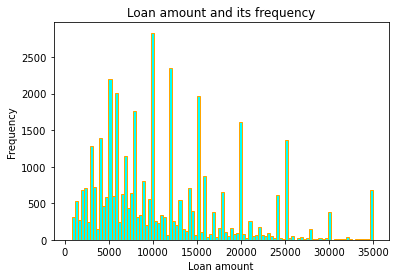

In [25]:
# looking at loan amount
plt.hist(lending_df['loan_amnt'], bins=100, edgecolor='Orange',color='cyan')
plt.title('Loan amount and its frequency')
plt.xlabel('Loan amount')
plt.ylabel('Frequency')
plt.show()

### Insights

1) People seem to apply for loan most frequenctly at increments of 5000  
2) Most commonly people apply for 10000 USD  
3) The amounts in between (that is not an increment of 5k) seem to be very less frequent and becomes rare as the amount increases (see there are close to 400 applications for a loan amount of 30,000 whereas virtually nothing till 35000 which has more than 500 applicants)

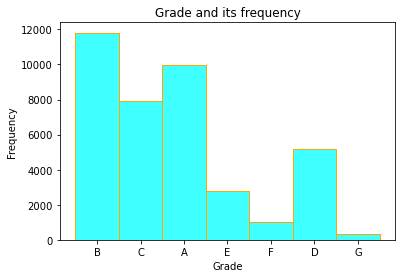

In [49]:
# looking at loan amount
sns.histplot(lending_df['grade'], bins = 20, edgecolor='Orange',color='cyan')
plt.title('Grade and its frequency')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

### Insights
Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.

1) There are 7 grades for loans
2) Grade and A, B and C are more common with being the most common.  
3) Very few loans are in D,E,F and G